<a href="https://colab.research.google.com/github/Mvital74/datasharing/blob/master/exercicio_9_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar Data Frame
url = 'https://raw.githubusercontent.com/Mvital74/DSWP/master/Dataframes/FIFA.csv'
df_fifa18 = pd.read_csv(url, index_col = 'ID')
df_fifa18.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df_fifa18.shape

(18207, 88)

In [3]:
#Transformar para lower
def transformacao_lower(df):
    # Primeira transformação: Aplicar lower() nos nomes das COLUNAS:
    df.columns = [col.lower() for col in df.columns]




In [4]:
transformacao_lower(df_fifa18)
df_fifa18.head(3)

,unnamed: 0,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [5]:
df_fifa18.columns

Index(['unnamed: 0', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club logo', 'value', 'wage', 'special',
       'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'real face', 'position',
       'jersey number', 'joined', 'loaned from', 'contract valid until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle'

In [6]:
df_fifa18_slice = df_fifa18[['name', 'age', 'nationality','club','value','wage','overall', 'potential', 'position', 'sprintspeed', 'shotpower']]
df_fifa18_slice

,name,age,nationality,club,value,wage,overall,potential,position,sprintspeed,shotpower
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,FC Barcelona,€110.5M,€565K,94,94,RF,86.0,85.0
20801,Cristiano Ronaldo,33,Portugal,Juventus,€77M,€405K,94,94,ST,91.0,95.0
190871,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,€290K,92,93,LW,90.0,80.0
193080,De Gea,27,Spain,Manchester United,€72M,€260K,91,93,GK,58.0,31.0
192985,K. De Bruyne,27,Belgium,Manchester City,€102M,€355K,91,92,RCM,76.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,Crewe Alexandra,€60K,€1K,47,65,CM,57.0,43.0
243165,N. Christoffersson,19,Sweden,Trelleborgs FF,€60K,€1K,47,63,ST,39.0,41.0
241638,B. Worman,16,England,Cambridge United,€60K,€1K,47,67,ST,69.0,45.0


In [7]:
df_fifa18_slice.dtypes # Necessidade de transformar value e wage em float

name            object
age              int64
nationality     object
club            object
value           object
wage            object
overall          int64
potential        int64
position        object
sprintspeed    float64
shotpower      float64
dtype: object

In [8]:
df_fifa18_slice.count() # Verificar NaN

name           18207
age            18207
nationality    18207
club           17966
value          18207
wage           18207
overall        18207
potential      18207
position       18147
sprintspeed    18159
shotpower      18159
dtype: int64

In [10]:
df_fifa18_slice.isnull().sum() # Qtdade NaN

name             0
age              0
nationality      0
club           241
value            0
wage             0
overall          0
potential        0
position        60
sprintspeed     48
shotpower       48
dtype: int64

In [9]:
df_fifa18_slice['club'] = df_fifa18_slice['club'].fillna('Free Agent')
df_fifa18_slice['position'] = df_fifa18_slice['club'].fillna('Not Identified')
df_fifa18_slice = df_fifa18_slice.fillna(0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df_fifa18_slice.isnull().sum() # Qtdade NaN

name           0
age            0
nationality    0
club           0
value          0
wage           0
overall        0
potential      0
position       0
sprintspeed    0
shotpower      0
dtype: int64

In [11]:
df_fifa18_slice['value'] = df_fifa18_slice['value'].str.replace('€','')
df_fifa18_slice['wage'] = df_fifa18_slice['wage'].str.replace('€','')

In [12]:
df_fifa18_slice


,name,age,nationality,club,value,wage,overall,potential,position,sprintspeed,shotpower
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,FC Barcelona,110.5M,565K,94,94,FC Barcelona,86.0,85.0
20801,Cristiano Ronaldo,33,Portugal,Juventus,77M,405K,94,94,Juventus,91.0,95.0
190871,Neymar Jr,26,Brazil,Paris Saint-Germain,118.5M,290K,92,93,Paris Saint-Germain,90.0,80.0
193080,De Gea,27,Spain,Manchester United,72M,260K,91,93,Manchester United,58.0,31.0
192985,K. De Bruyne,27,Belgium,Manchester City,102M,355K,91,92,Manchester City,76.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,Crewe Alexandra,60K,1K,47,65,Crewe Alexandra,57.0,43.0
243165,N. Christoffersson,19,Sweden,Trelleborgs FF,60K,1K,47,63,Trelleborgs FF,39.0,41.0
241638,B. Worman,16,England,Cambridge United,60K,1K,47,67,Cambridge United,69.0,45.0


In [13]:
df_fifa18_slice['wage'] = df_fifa18_slice['wage'].map(lambda x: int(x.replace('K', ''))*1000)
df_fifa18_slice

,name,age,nationality,club,value,wage,overall,potential,position,sprintspeed,shotpower
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,FC Barcelona,110.5M,565000,94,94,FC Barcelona,86.0,85.0
20801,Cristiano Ronaldo,33,Portugal,Juventus,77M,405000,94,94,Juventus,91.0,95.0
190871,Neymar Jr,26,Brazil,Paris Saint-Germain,118.5M,290000,92,93,Paris Saint-Germain,90.0,80.0
193080,De Gea,27,Spain,Manchester United,72M,260000,91,93,Manchester United,58.0,31.0
192985,K. De Bruyne,27,Belgium,Manchester City,102M,355000,91,92,Manchester City,76.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,Crewe Alexandra,60K,1000,47,65,Crewe Alexandra,57.0,43.0
243165,N. Christoffersson,19,Sweden,Trelleborgs FF,60K,1000,47,63,Trelleborgs FF,39.0,41.0
241638,B. Worman,16,England,Cambridge United,60K,1000,47,67,Cambridge United,69.0,45.0


In [14]:
def money_num(money):
  if money[-1] == 'M':
    return float(money.replace('M', ''))*1000000
  else:
    return float(money.replace('K', ''))*1000

df_fifa18_slice['value'] = df_fifa18_slice['value'].apply(money_num)
df_fifa18_slice

,name,age,nationality,club,value,wage,overall,potential,position,sprintspeed,shotpower
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,FC Barcelona,110500000.0,565000,94,94,FC Barcelona,86.0,85.0
20801,Cristiano Ronaldo,33,Portugal,Juventus,77000000.0,405000,94,94,Juventus,91.0,95.0
190871,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000.0,290000,92,93,Paris Saint-Germain,90.0,80.0
193080,De Gea,27,Spain,Manchester United,72000000.0,260000,91,93,Manchester United,58.0,31.0
192985,K. De Bruyne,27,Belgium,Manchester City,102000000.0,355000,91,92,Manchester City,76.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,Crewe Alexandra,60000.0,1000,47,65,Crewe Alexandra,57.0,43.0
243165,N. Christoffersson,19,Sweden,Trelleborgs FF,60000.0,1000,47,63,Trelleborgs FF,39.0,41.0
241638,B. Worman,16,England,Cambridge United,60000.0,1000,47,67,Cambridge United,69.0,45.0


In [15]:
pd.set_option('max_rows', 99999)
df_nacionalidade = df_fifa18_slice.groupby(['nationality']).agg({'age': ['count']})
df_nacionalidade.sort_values(('age', 'count'), ascending=False).head(10)

,age
,count
nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618


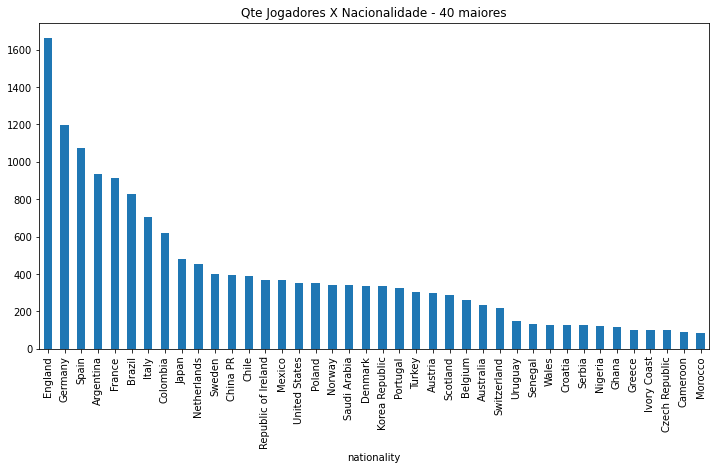

In [84]:
df_nacionalidade.sort_values(('age', 'count'), ascending=False).head(40).plot(kind = 'bar', legend = False, title = "Qte Jogadores X Nacionalidade - 40 maiores", figsize=(12,6))

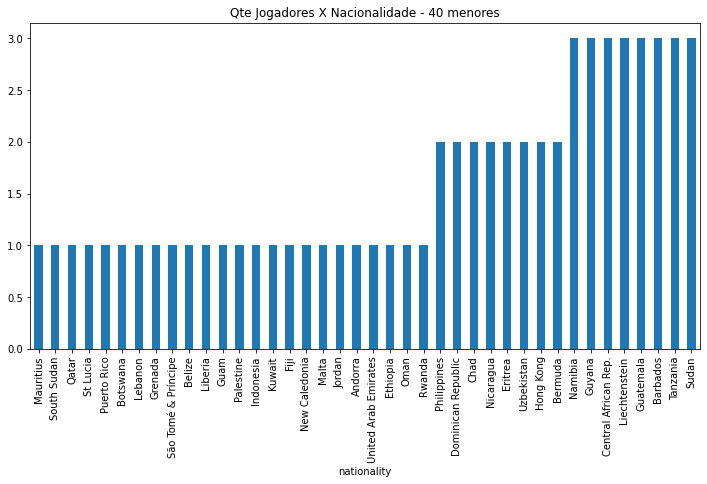

In [54]:
df_nacionalidade.sort_values(('age', 'count'), ascending=True).head(40).plot(kind = 'bar', legend = False, figsize=(12,6), title = "Qte Jogadores X Nacionalidade - 40 menores")

In [17]:
df_nacionalidade_mean = df_fifa18_slice.groupby(['nationality']).agg({'age': ['mean']})
df_nacionalidade_mean.sort_values(('age', 'mean'), ascending=False).head(10)

,age
,mean
nationality,
Oman,36.00
Puerto Rico,34.00
Ethiopia,32.00
Trinidad & Tobago,31.75
Kuwait,31.00
São Tomé & Príncipe,31.00
Palestine,31.00
Guam,30.00


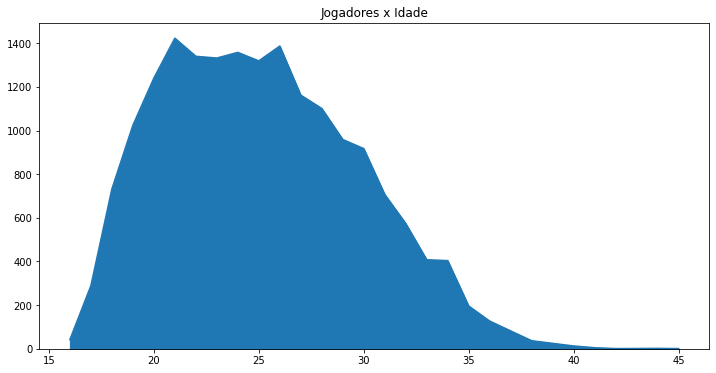

In [56]:
df_fifa18_slice['age'].value_counts().sort_index().plot(kind = 'area', figsize=(12,6), title = "Jogadores x Idade")

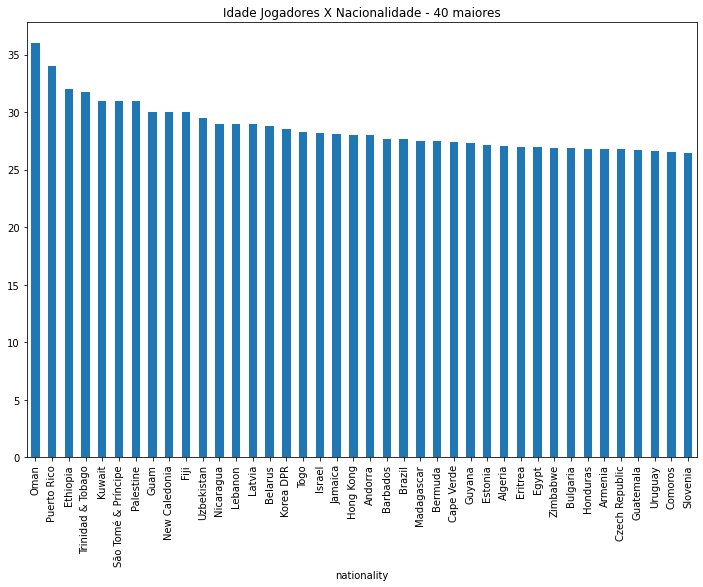

In [62]:
df_nacionalidade_mean.sort_values(('age', 'mean'), ascending=False).head(40).plot(kind = 'bar', legend = False, figsize=(12,8), title = "Idade Jogadores X Nacionalidade - 40 maiores")

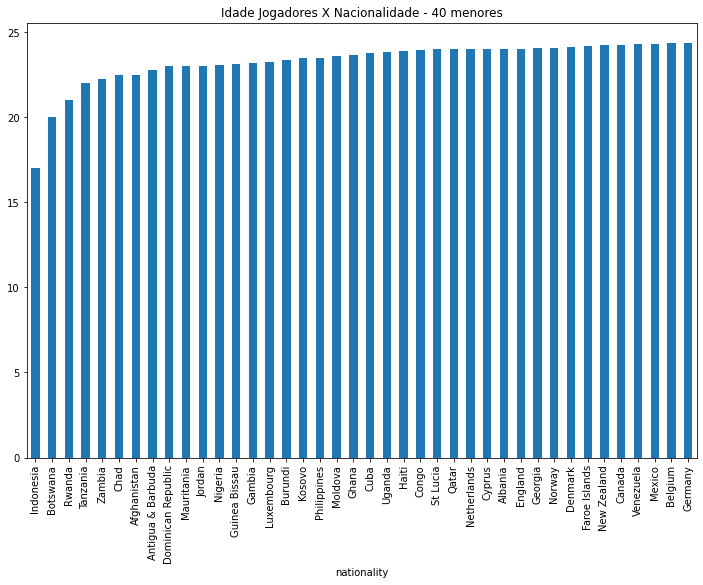

In [63]:
df_nacionalidade_mean.sort_values(('age', 'mean'), ascending=True).head(40).plot(kind = 'bar', legend = False, figsize=(12,8), title = "Idade Jogadores X Nacionalidade - 40 menores")

In [ ]:
df_qt_jog_clube = df_fifa18_slice.groupby(['club']).agg({'age': ['count']})
df_qt_jog_clube.sort_values(('age', 'count'), ascending=False).head(10)

,age
,count
club,
Free Agent,241
Borussia Dortmund,33
AS Monaco,33
Valencia CF,33
Arsenal,33
Fortuna Düsseldorf,33
Atlético Madrid,33
Tottenham Hotspur,33


In [118]:
conta_jogadores = df_fifa18_slice[df_fifa18_slice['club'] != 'Free Agent']
conta_jogadores['club'].value_counts().sort_values()#.plot( xlabel='Times', ylabel = 'Quantidade', kind = 'area', figsize=(12,6), title = "Qte Jogadores", use_index = False)

Derry City                             18
Sligo Rovers                           19
Limerick FC                            19
Ceará Sporting Club                    20
Fluminense                             20
Atlético Paranaense                    20
Botafogo                               20
Internacional                          20
Tromsø IL                              20
Vitória                                20
Sport Club do Recife                   20
Grêmio                                 20
Atlético Mineiro                       20
Bahia                                  20
Santos                                 20
América FC (Minas Gerais)              20
Chapecoense                            20
Paraná                                 20
Cruzeiro                               20
Melbourne Victory                      21
Wellington Phoenix                     21
Dalkurd FF                             21
Shamrock Rovers                        22
FK Haugesund                      

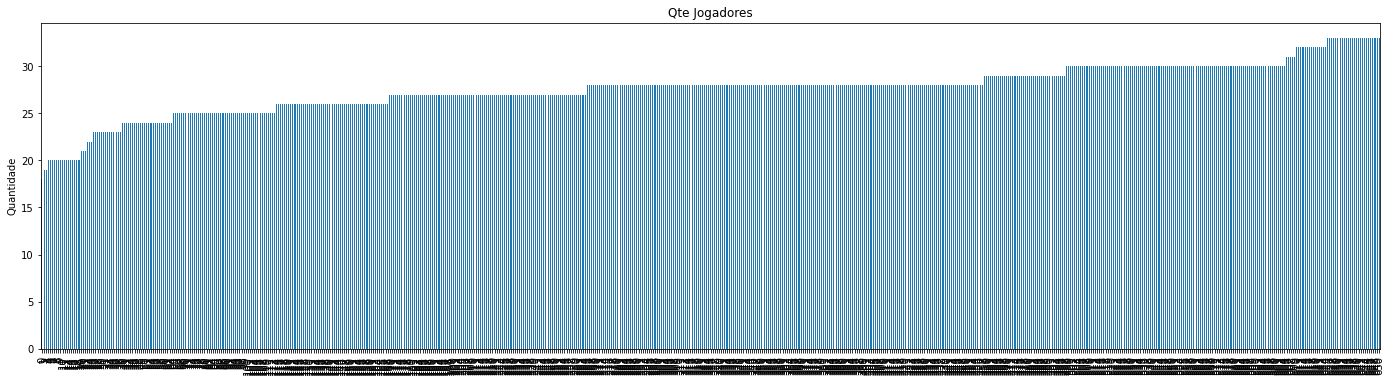

In [100]:
conta_jogadores['club'].value_counts().sort_values().plot( ylabel = 'Quantidade', kind = 'bar', figsize=(24,6), title = "Qte Jogadores", use_index = False)

In [ ]:
df_clube_idade = df_fifa18_slice.groupby(['club']).agg({'age': ['mean']})
df_clube_idade.sort_values(('age','mean'), ascending=False).head(10)

,age
,mean
club,
Paraná,31.6
Cruzeiro,30.6
Atlético Paranaense,30.4
Botafogo,30.4
Chapecoense,30.4
Ceará Sporting Club,30.2
Sport Club do Recife,30.2
Fluminense,30.2


In [ ]:
df_salario_nacionalidade = df_fifa18_slice.groupby(['nationality']).agg({'wage': ['mean']})
df_salario_nacionalidade.sort_values(('wage', 'mean'), ascending=False).head(10)

,wage
,mean
nationality,
Dominican Republic,71000.000000
United Arab Emirates,39000.000000
Gabon,26933.333333
Armenia,22000.000000
Croatia,21682.539683
Central African Rep.,19000.000000
Belgium,18480.769231
Algeria,18083.333333


In [ ]:
df_salario_clube = df_fifa18_slice.groupby(['club']).agg({'wage':['mean']})
df_salario_clube.sort_values(('wage','mean'), ascending=False).head(10)

,wage
,mean
club,
Real Madrid,152030.303030
FC Barcelona,146575.757576
Juventus,131680.000000
Manchester City,113363.636364
Manchester United,102757.575758
Chelsea,98454.545455
Liverpool,87939.393939
Tottenham Hotspur,79484.848485


In [ ]:
df_salario_idade = df_fifa18_slice.groupby(['age']).agg({'wage': ['mean']})
df_salario_idade.sort_values(('wage', 'mean'), ascending=False)

,wage
,mean
age,
31,15977.369165
29,14057.351408
32,14045.296167
28,13917.347866
27,13591.222031
30,13459.105780
33,13127.450980
26,12878.875270


In [86]:
df_gasto_clube = df_fifa18_slice.groupby(['club']).agg({'wage': ['sum']})
df_gasto_clube.sort_values(('wage', 'sum'), ascending=False).head(10)

,wage
,sum
club,
Real Madrid,5017000
FC Barcelona,4837000
Manchester City,3741000
Manchester United,3391000
Juventus,3292000
Chelsea,3249000
Liverpool,2902000
Tottenham Hotspur,2623000


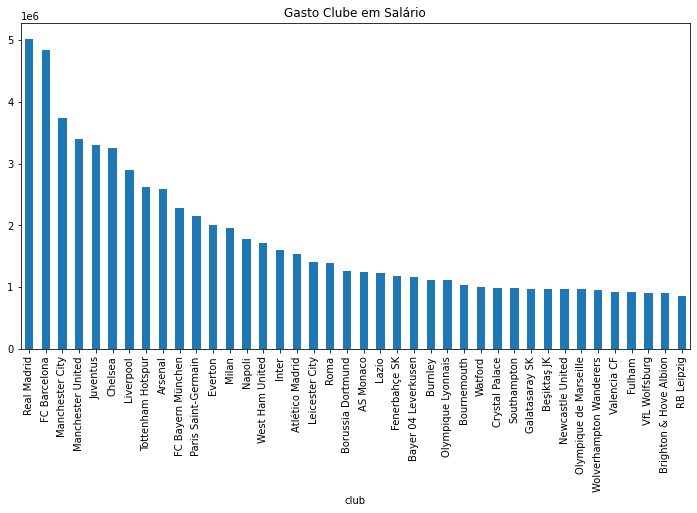

In [87]:
df_gasto_clube.sort_values(('wage', 'sum'), ascending=False).head(40).plot(kind = 'bar', legend = False, title = "Gasto Clube em Salário", figsize=(12,6))

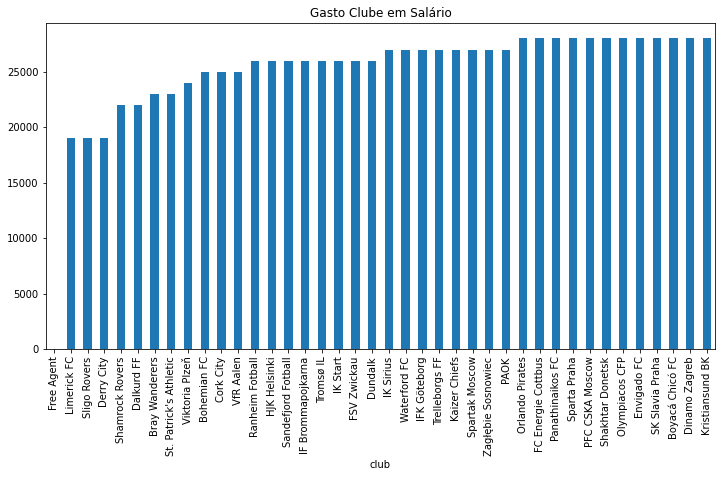

In [88]:
df_gasto_clube.sort_values(('wage', 'sum'), ascending=True).head(40).plot(kind = 'bar', legend = False, title = "Gasto Clube em Salário", figsize=(12,6))

In [ ]:
set_Colunas_Correlacionadas = set()
matriz_correlacao = df_fifa18_slice.corr().where(np.triu(np.ones(df_fifa18_slice.corr().shape), k = 1).astype(np.bool))
matriz_correlacao



,age,value,wage,overall,potential,sprintspeed,shotpower
age,NaN,0.075022,0.141145,0.452350,-0.253312,-0.147450,0.154884
value,NaN,NaN,0.858442,0.627085,0.576218,0.172548,0.280628
wage,NaN,NaN,NaN,0.571926,0.486413,0.131222,0.257915
overall,NaN,NaN,NaN,NaN,0.660939,0.212304,0.440144
potential,NaN,NaN,NaN,NaN,NaN,0.238815,0.290101
sprintspeed,NaN,NaN,NaN,NaN,NaN,NaN,0.560101
shotpower,NaN,NaN,NaN,NaN,NaN,NaN,NaN


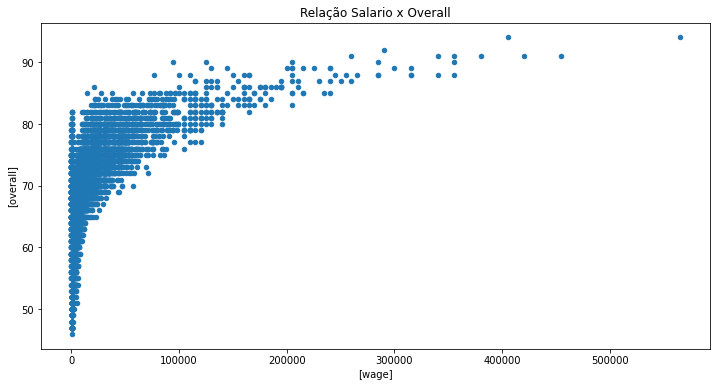

In [97]:
df_fifa18_slice.plot(x=['wage'], y=['overall'], kind = 'scatter', figsize=(12,6), title = 'Relação Salario x Overall')

##O Potential tem uma correlação considerável com o overall e o salário, porém é correlacionado negativamente com a idade dos jogadores.

## Questão interessante é que a idade é relacionada negativamente com a sprintspeed. Por outro lado, o shotpower é consideravelmente relacionado com o shotpower

In [ ]:
df_overall_age = df_fifa18_slice.groupby(['age']).agg({'overall':['count','min', 'max', 'median', 'mean']})
df_overall_age

overall                          
      count min max median       mean
age                                  
16       42  46  64   53.5  54.452381
17      289  47  77   56.0  56.404844
18      732  47  82   57.0  57.741803
19     1024  47  88   59.0  59.583008
20     1240  47  81   61.0  61.858871
21     1423  48  83   63.0  63.480675
22     1340  48  86   64.0  64.994030
23     1332  50  86   66.0  66.244745
24     1358  50  89   67.0  67.306333
25     1319  51  90   67.0  67.973465
26     1387  50  92   68.0  68.514780
27     1162  50  91   69.0  68.949225
28     1101  51  90   69.0  69.213442
29      959  53  90   69.0  69.246090
30      917  52  89   69.0  69.695747
31      707  50  94   70.0  69.850071
32      574  52  91   69.0  69.529617
33      408  48  94   69.0  69.558824
34      404  54  86   69.0  69.539604
35      196  53  85   68.0  68.132653
36      127  53  85   67.0  67.937008
37       82  55  84   70.0  68.939024
38       37  54  74   68.0  67.378378
39       25  52  80   70.0  67.640000
40       13  52  88   66.0  67.692308
41        5  59  77   68.0  67.600000
42        1  65  65   65.0  65.000000
44        2  48  53   50.5  50.500000
45        1  71  71   71.0  71.000000

In [ ]:
df_overall_club = df_fifa18_slice.groupby(['club']).agg({'overall':['count','min', 'max', 'median', 'mean', 'std']})
df_overall_club.sort_values(('overall', 'mean'), ascending=False).head(10)

overall                                    
                      count min max median       mean       std
club                                                           
Juventus                 25  62  94   84.0  82.280000  6.560742
Napoli                   25  70  88   81.0  80.000000  4.645787
Inter                    24  64  88   81.0  79.750000  5.704689
Real Madrid              33  62  91   80.0  78.242424  9.902747
Milan                    27  66  88   79.0  78.074074  4.945285
FC Barcelona             33  61  94   82.0  78.030303  9.583465
Paris Saint-Germain      30  62  92   79.5  77.433333  9.023660
Roma                     26  64  85   78.0  77.423077  6.060845
Manchester United        33  63  91   79.0  77.242424  7.701584
SL Benfica               28  67  84   77.0  77.000000  4.118612

In [ ]:
df_potential_club = df_fifa18_slice.groupby(['club']).agg({'potential':['count','min', 'max', 'median', 'mean', 'std']})
df_potential_club.sort_values(('potential', 'mean'), ascending=False).head(10)

potential                                    
                        count min max median       mean       std
club                                                             
Juventus                   25  72  94   86.0  85.520000  4.528797
FC Barcelona               33  75  94   86.0  85.303030  4.837903
Real Madrid                33  71  92   86.0  84.636364  5.699880
Manchester City            33  68  92   85.0  83.909091  5.620074
FC Bayern München          29  72  90   85.0  83.655172  5.266307
Paris Saint-Germain        30  66  95   84.0  83.566667  5.763639
Napoli                     25  76  90   83.0  83.440000  4.203966
Manchester United          33  74  93   83.0  82.666667  4.694855
Chelsea                    33  72  91   83.0  82.636364  4.709155
Milan                      27  67  93   83.0  82.555556  5.507571

In [ ]:
df_filtered = df_fifa18[df_fifa18['position'] == 'GK']
df_filtered[['name','club','potential']].sort_values(('potential'), ascending=False).head(10)

,name,club,potential
ID,,,
193080,De Gea,Manchester United,93
200389,J. Oblak,Atlético Madrid,93
230621,G. Donnarumma,Milan,93
192448,M. ter Stegen,FC Barcelona,92
206585,Kepa,Chelsea,91
210257,Ederson,Manchester City,90
212831,Alisson,Liverpool,90
192119,T. Courtois,Real Madrid,90
231691,A. Lafont,Fiorentina,90


In [ ]:
df_filtered[['name','club','overall']].sort_values(('overall'), ascending=False).head(10)

,name,club,overall
ID,,,
193080,De Gea,Manchester United,91
200389,J. Oblak,Atlético Madrid,90
192448,M. ter Stegen,FC Barcelona,89
192119,T. Courtois,Real Madrid,89
167495,M. Neuer,FC Bayern München,89
167948,H. Lloris,Tottenham Hotspur,88
162835,S. Handanovič,Inter,88
1179,G. Buffon,Paris Saint-Germain,88
193041,K. Navas,Real Madrid,87


In [ ]:
df_fifa18[['name','club','sprintspeed']].sort_values(('sprintspeed'), ascending=False).head(10)

,name,club,sprintspeed
ID,,,
213956,Adama,Wolverhampton Wanderers,96.0
222492,L. Sané,Manchester City,96.0
231747,K. Mbappé,Paris Saint-Germain,96.0
216258,I. Bebou,Hannover 96,95.0
173731,G. Bale,Real Madrid,95.0
207444,J. Damm,Tigres U.A.N.L.,95.0
188567,P. Aubameyang,Arsenal,95.0
206070,Maicon,Livorno,95.0
182160,E. Knudtzon,Lillestrøm SK,94.0


In [ ]:
df_fifa18[['name', 'club', 'shotpower']].sort_values(('shotpower'), ascending=False).head(10)

,name,club,shotpower
ID,,,
20801,Cristiano Ronaldo,Juventus,95.0
189362,Hulk,Shanghai SIPG FC,94.0
169051,F. Guarín,Shanghai Greenland Shenhua FC,93.0
150516,L. Podolski,Vissel Kobe,92.0
173731,G. Bale,Real Madrid,92.0
171919,Naldo,FC Schalke 04,92.0
192985,K. De Bruyne,Manchester City,91.0
185103,A. Kolarov,Roma,91.0
195864,P. Pogba,Manchester United,90.0


In [ ]:
df_fifa18_slice['wage'].describe()

count     18207.000000
mean       9731.312133
std       21999.290406
min           0.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: wage, dtype: float64

In [ ]:
q1_wage = df_fifa18_slice['wage'].quantile(q=0.25)
q3_wage = df_fifa18_slice['wage'].quantile(q=0.75)
ir_wage = (q3_wage - q1_wage)*1.5
sl_wage = q3_wage + ir_wage

df_filtered_wage = df_fifa18_slice[df_fifa18_slice['wage'] >= sl_wage]
df_filtered_wage[['name','club','wage']].sort_values(('wage'), ascending=False).head(10)

,name,club,wage
ID,,,
158023,L. Messi,FC Barcelona,565000
176580,L. Suárez,FC Barcelona,455000
177003,L. Modrić,Real Madrid,420000
20801,Cristiano Ronaldo,Juventus,405000
155862,Sergio Ramos,Real Madrid,380000
192985,K. De Bruyne,Manchester City,355000
173731,G. Bale,Real Madrid,355000
182521,T. Kroos,Real Madrid,355000
183277,E. Hazard,Chelsea,340000


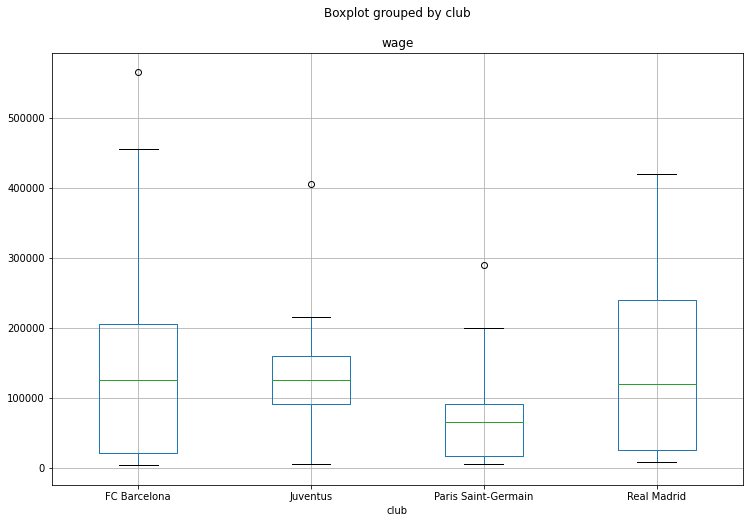

In [133]:
df_nelio = df_fifa18_slice.loc[df_fifa18_slice['club'].isin(['FC Barcelona', 'Real Madrid', 'Paris Saint-Germain', 'Bayern Munich', 'Juventus'])]
 
df_nelio.boxplot(by='club', column='wage', figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa156f94ac8>,
      dtype=object)

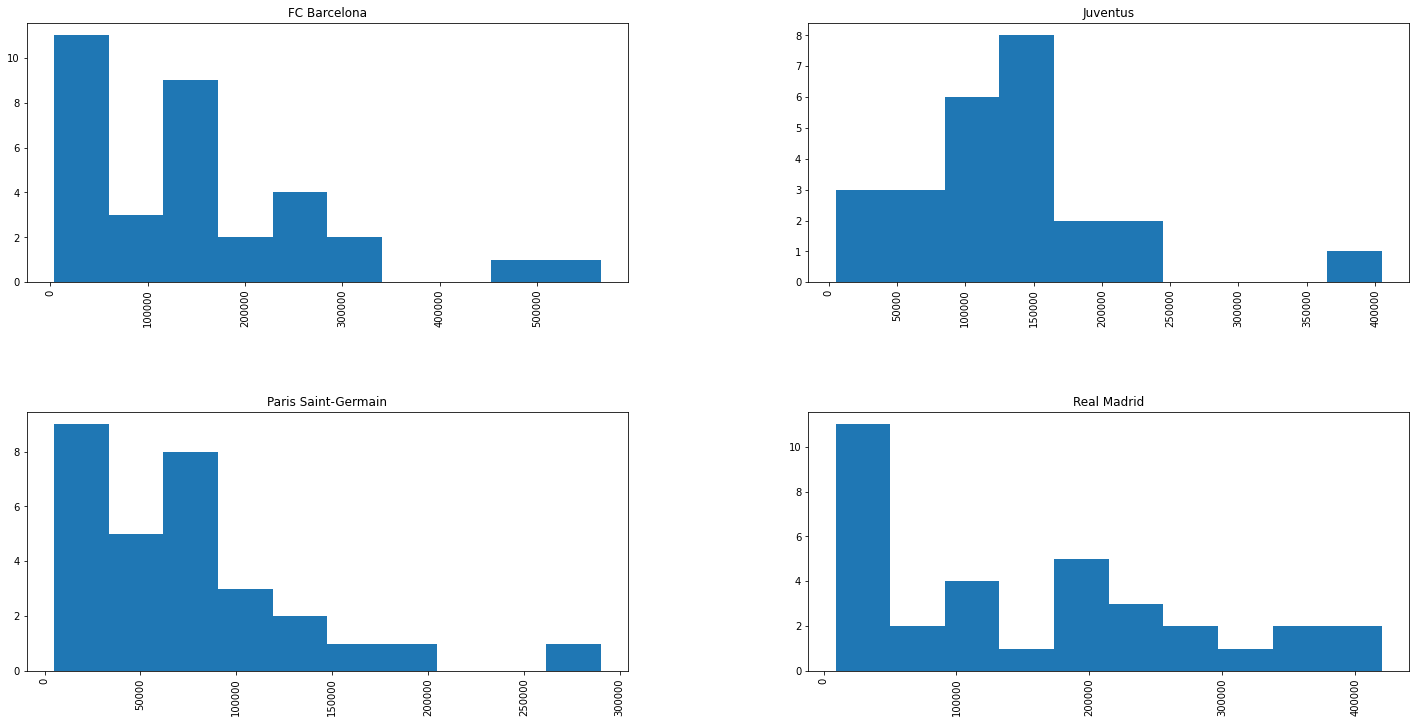

In [128]:
df_nelio.hist(by='club', column='wage', figsize=(24,12))

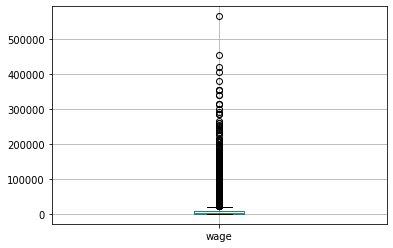

In [ ]:
boxplot_wage = df_fifa18_slice.boxplot(column=['wage'])

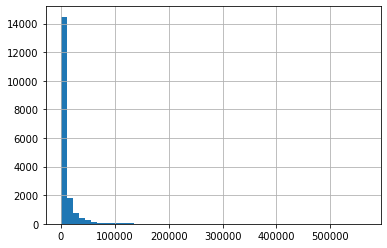

In [ ]:
hist_wage = df_fifa18_slice['wage'].hist(bins=50)

In [ ]:
df_fifa18_slice['shotpower'].describe()

count    18207.000000
mean        55.313835
std         17.448546
min          0.000000
25%         45.000000
50%         59.000000
75%         68.000000
max         95.000000
Name: shotpower, dtype: float64

In [ ]:
q1_shotpower = df_fifa18_slice['shotpower'].quantile(q=0.25)
q3_shotpower = df_fifa18_slice['shotpower'].quantile(q=0.75)
is_shotpower = q1_shotpower - (q3_shotpower - q1_shotpower)*1.5

df_filtered_shotpower = df_fifa18_slice[df_fifa18_slice['shotpower'] <= is_shotpower]
df_filtered_shotpower[['name','club','shotpower']].sort_values(('shotpower'), ascending = False).head(10)

,name,club,shotpower
ID,,,
143598,L. Pocrnjic,Club Atlético Aldosivi,10.0
144160,T. Acar,Sivasspor,10.0
155871,B. Białkowski,Ipswich Town,10.0
204438,C. Diop,Montreal Impact,10.0
186488,Li Shuai,Shanghai Greenland Shenhua FC,9.0
211768,L. Italiano,Newcastle Jets,9.0
244418,João Lopes,Santa Clara,9.0
234000,Sander Asevedo,Paraná,9.0
192120,Geng Xiaofeng,Hebei China Fortune FC,8.0


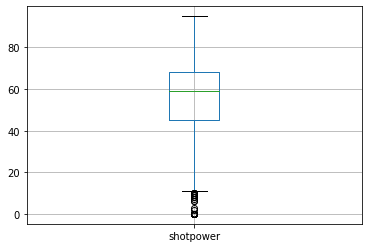

In [ ]:
boxplot_wage = df_fifa18_slice.boxplot(column=['shotpower'])

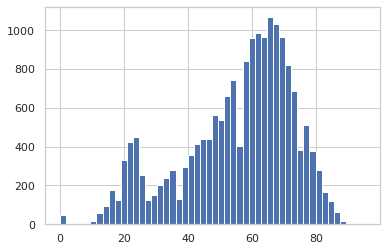

In [ ]:
hist_wage = df_fifa18_slice['shotpower'].hist(bins=50)